# Introduction

`Kezia Intan Natalie`

`Batch 03`

## Problem Statement

In this project i want to predict someone's age by their face

Link HuggingFace : `https://huggingface.co/spaces/Keziaa/Milestone2-Phase2`

## Import Library

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import pickle
import pathlib

import tensorflow as tf
from tensorflow import keras
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation
from keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import classification_report, roc_auc_score

In [3]:
print('CPU: {}'.format(len(tf.config.list_physical_devices('CPU'))))
print('GPU: {}'.format(len(tf.config.list_physical_devices('GPU'))))

CPU: 1
GPU: 1


In [4]:
tf.random.set_seed(2712)

## Data Loading

In [5]:
def pict(category):
  a = glob.glob(category)

  w=20
  h=20
  fig=plt.figure(figsize=(10, 10))
  columns = 5
  rows = 1
  for i in range(1, columns*rows +1):
      img = plt.imread(a[i])
      fig.add_subplot(rows, columns, i)
      plt.imshow(img)
  plt.show()

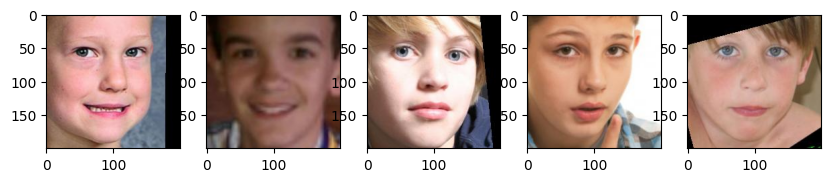

In [6]:
pict('train/10/*')

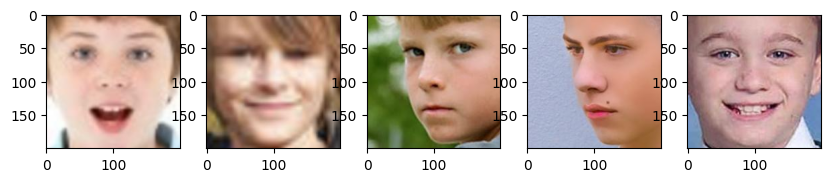

In [7]:
pict('train/20/*')

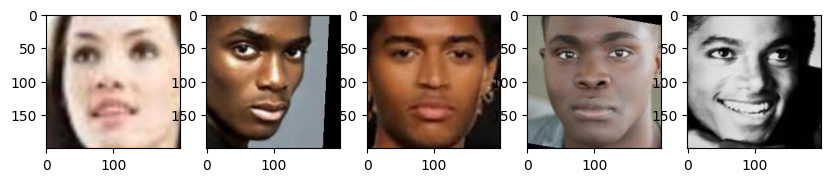

In [8]:
pict('train/30/*')

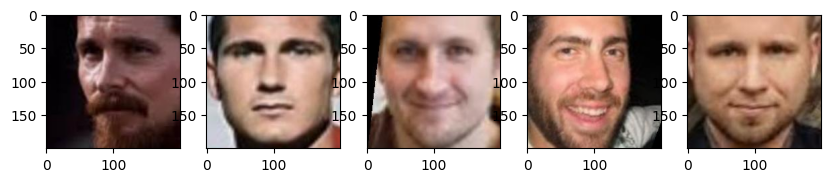

In [9]:
pict('train/40/*')

## Exploratory and Analysis

In [10]:
train_path = r'train/'
test_path = r'test/'

In [11]:
data_train = pathlib.Path(train_path)
image_count = len(list(data_train.glob('*/*.jpg')))
print(image_count)

5400


In [12]:
data_test = pathlib.Path(test_path)
image_count = len(list(data_test.glob('*/*.jpg')))
print(image_count)

1080


## Data Prepocessing

In [13]:
IMG_SIZE = (150,150)
BATCH_SIZE = 64

In [14]:
train_data = ImageDataGenerator(rescale=1./255.,
                                rotation_range=20,
                                zoom_range=0.2,
                                width_shift_range=0.2,
                                shear_range=0.2,
                                fill_mode='nearest',
                                horizontal_flip=True,
                                vertical_flip=True)
test_data = ImageDataGenerator(rescale=1./255.,
                               rotation_range=20,
                                zoom_range=0.2,
                                width_shift_range=0.2,
                                shear_range=0.2,
                                fill_mode='nearest',
                                horizontal_flip=True,
                                vertical_flip=True)

train_gen = train_data.flow_from_directory(
	"train",
	target_size=IMG_SIZE,
	class_mode='categorical',
  batch_size=BATCH_SIZE
)
test_gen = test_data.flow_from_directory(
	"test",
	target_size=IMG_SIZE,
	class_mode='categorical',
  batch_size=BATCH_SIZE
)

Found 5400 images belonging to 4 classes.
Found 1080 images belonging to 4 classes.


c:\Users\LENOVO\anaconda3\envs\tensorflow\lib\site-packages\matplotlib\text.py:1241: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


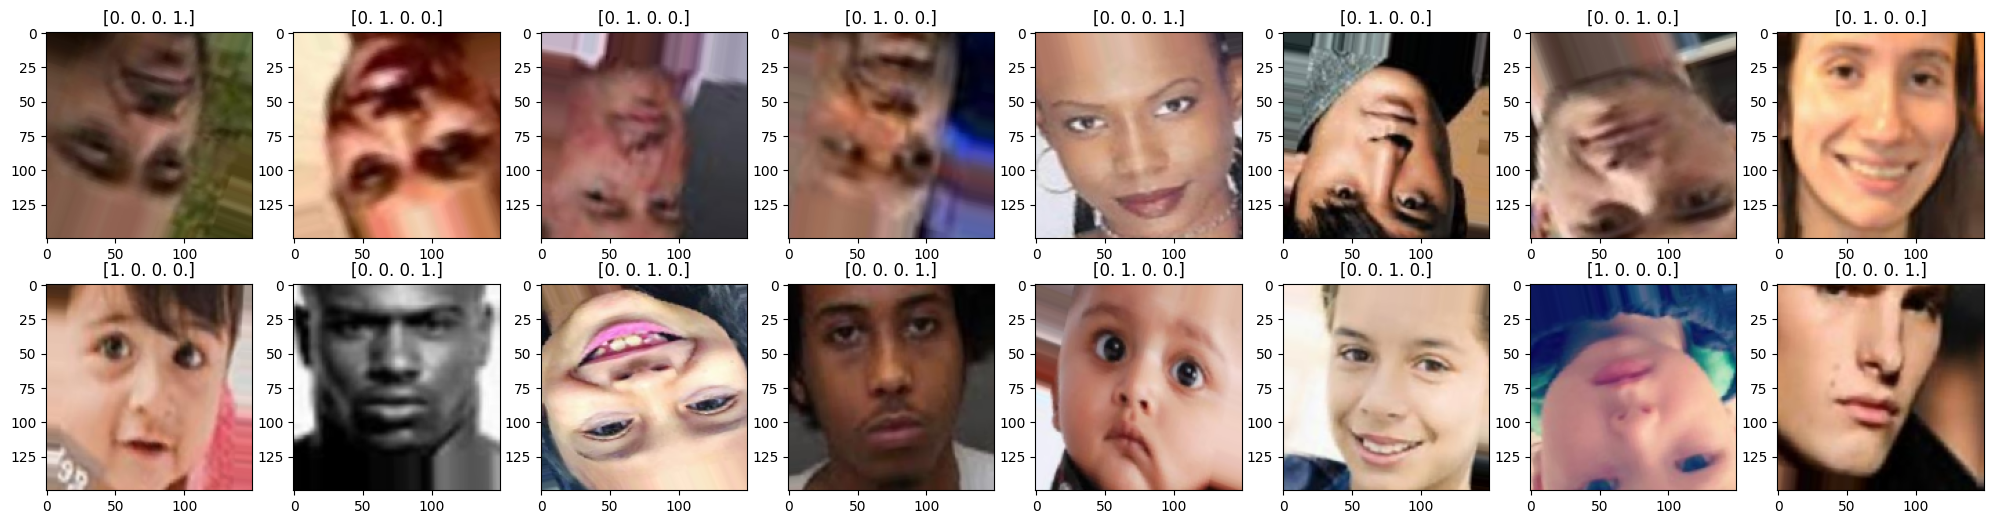

In [15]:
fig,ax = plt.subplots(nrows=2,ncols=8,figsize=(25,6))
n=0
for i in range(2):
  for j in range(8):
    img = train_gen.next()[0][n]
    ax[i][j].imshow(img)
    ax[i][j].set_title(train_gen.next()[1][n])
    n+=1

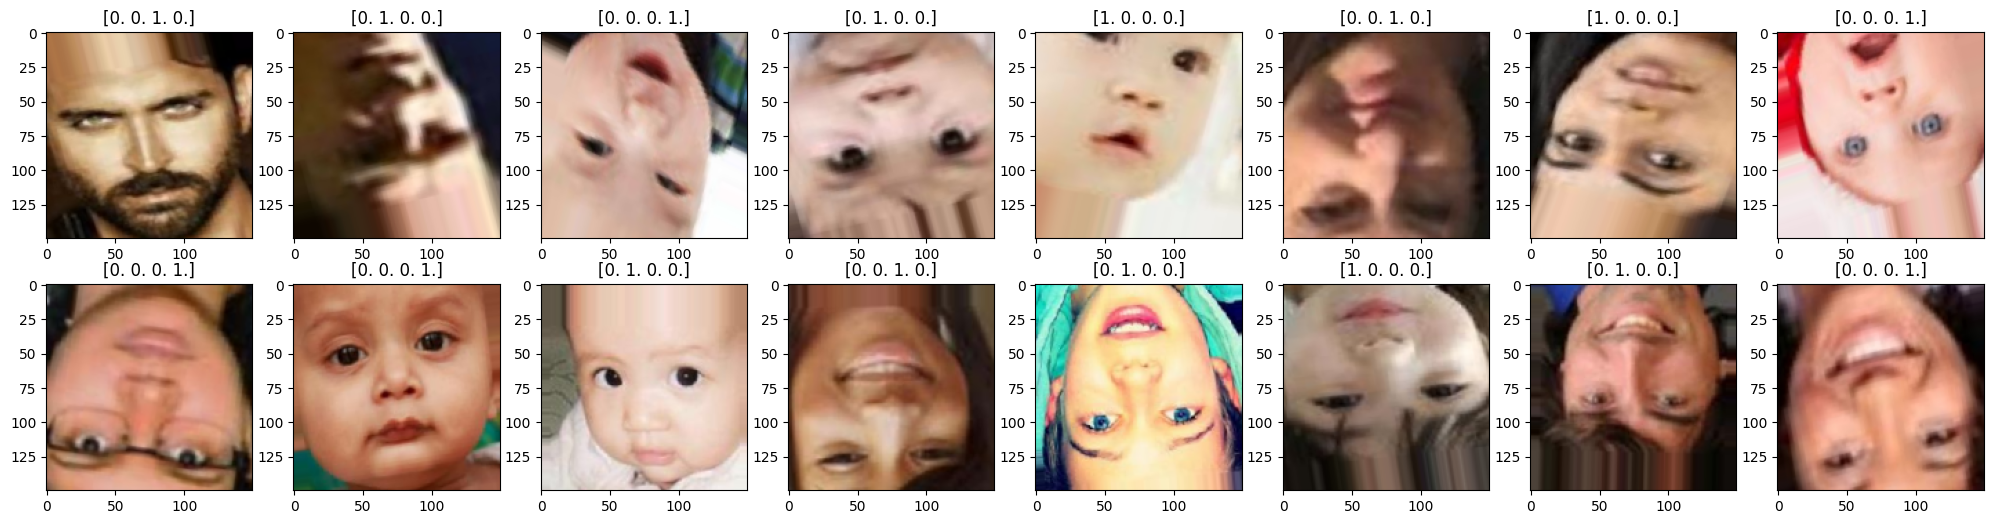

In [19]:
fig,ax = plt.subplots(nrows=2,ncols=8,figsize=(25,6))
n=0
for i in range(2):
  for j in range(8):
    img = test_gen.next()[0][n]
    ax[i][j].imshow(img)
    ax[i][j].set_title(test_gen.next()[1][n])
    n+=1

## Model Definition

In [16]:
size_ = 64

model = tf.keras.models.Sequential()

model.add(Conv2D(32, (3, 3), input_shape = (size_, size_, 3), activation = 'relu', padding='same'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(64, (3, 3), activation = 'relu', padding='same'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(128, (3, 3), activation = 'relu', padding='same'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Flatten())

model.add(Dense(units = 16, activation = 'relu'))
model.add(Dense(units = 4, activation = 'softmax'))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 8, 8, 128)        0

In [ ]:
model.compile(optimizer = tf.keras.optimizers.SGD(learning_rate=0.01), loss = 'categorical_crossentropy', metrics = ['accuracy'])

early_stopping = tf.keras.callbacks.EarlyStopping(patience = 5,
                                                  restore_best_weights = True)

history = model.fit(train_data,
                    epochs = 100,
                    validation_data = test_data,
                    callbacks = early_stopping)

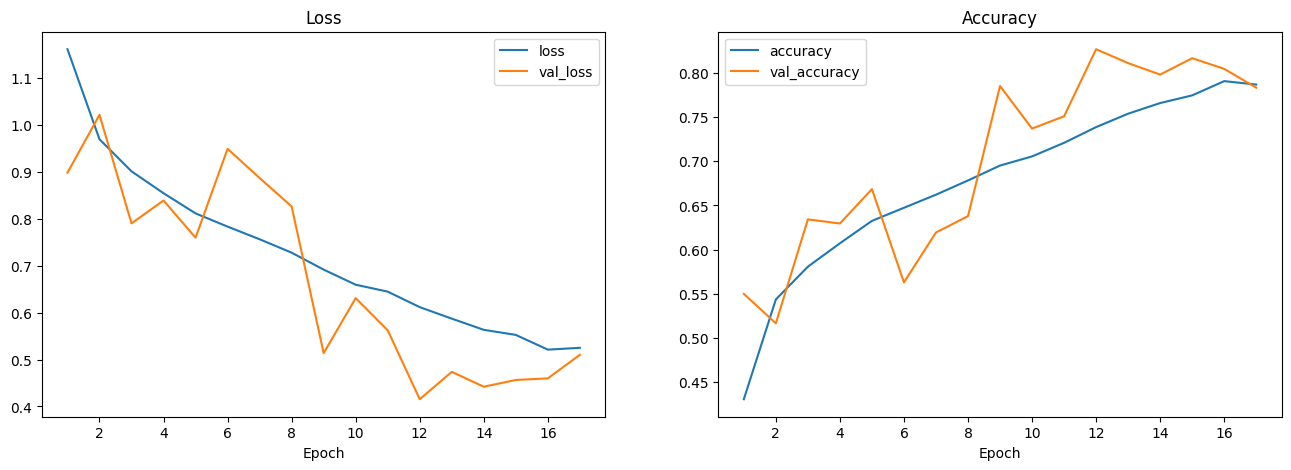

In [ ]:
epoch=17

fig, ax = plt.subplots(ncols=2,figsize=(16,5))
ax[0].plot(range(1,epoch+1),history.history['loss'],label='loss')
ax[0].plot(range(1,epoch+1),history.history['val_loss'],label='val_loss')
ax[0].set_title('Loss')
ax[0].legend()
ax[0].set_xlabel('Epoch')
#ax[0].set_ylim(0,0.01)

ax[1].plot(range(1,epoch+1),history.history['accuracy'],label='accuracy')
ax[1].plot(range(1,epoch+1),history.history['val_accuracy'],label='val_accuracy')
ax[1].set_title('Accuracy')
ax[1].legend()
ax[1].set_xlabel('Epoch')
#ax[1].set_ylim(0.5,1.5)

plt.show()

## Model Improvement

In [ ]:
size_ = 128

model_imp = tf.keras.models.Sequential()

model_imp.add(Conv2D(32, (3, 3), input_shape = (size_, size_, 3), activation = 'relu', padding='same', kernel_initializer='HeNormal'))
model_imp.add(MaxPooling2D(pool_size = (2, 2)))
model_imp.add(Conv2D(64, (3, 3), activation = 'relu', padding='same', kernel_initializer='HeNormal'))
model_imp.add(MaxPooling2D(pool_size = (2, 2)))
model_imp.add(Conv2D(128, (3, 3), activation = 'relu', padding='same', kernel_initializer='HeNormal'))
model_imp.add(MaxPooling2D(pool_size = (2, 2)))
model_imp.add(tf.keras.layers.Dropout(0.1))
model_imp.add(Flatten())

model_imp.add(Dense(units = 512, activation = 'relu'))
model_imp.add(Dense(units = 4, activation = 'softmax'))

model_imp.compile(optimizer = tf.keras.optimizers.SGD(learning_rate=0.01), loss = 'categorical_crossentropy', metrics = ['accuracy'])

train = ImageDataGenerator(rescale = 1./255)
test = ImageDataGenerator(rescale = 1./255)
train_data = train.flow_from_directory('train', target_size = (size_, size_), batch_size = 1, class_mode = 'categorical')
test_data = test.flow_from_directory('test', target_size = (size_, size_), batch_size = 1, class_mode = 'categorical')

Found 5400 images belonging to 4 classes.
Found 1080 images belonging to 4 classes.


In [ ]:
model_imp.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 32, 32, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 32, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 16, 16, 128)     

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(patience = 5,
                                                  restore_best_weights = True)

history_imp = model_imp.fit(train_data,
                            epochs = 50,
                            validation_data = test_data,
                            callbacks = early_stopping)

Epoch 1/50
5400/5400 [==============================] - 43s 8ms/step - loss: 1.0595 - accuracy: 0.5076 - val_loss: 0.9301 - val_accuracy: 0.5620
Epoch 2/50
5400/5400 [==============================] - 41s 8ms/step - loss: 0.8788 - accuracy: 0.6043 - val_loss: 0.7065 - val_accuracy: 0.6824
Epoch 3/50
5400/5400 [==============================] - 41s 8ms/step - loss: 0.7728 - accuracy: 0.6643 - val_loss: 0.6164 - val_accuracy: 0.7556
Epoch 4/50
5400/5400 [==============================] - 43s 8ms/step - loss: 0.6624 - accuracy: 0.7102 - val_loss: 0.5177 - val_accuracy: 0.7944
Epoch 5/50
5400/5400 [==============================] - 43s 8ms/step - loss: 0.5488 - accuracy: 0.7680 - val_loss: 0.3966 - val_accuracy: 0.8139
Epoch 6/50
5400/5400 [==============================] - 43s 8ms/step - loss: 0.4202 - accuracy: 0.8328 - val_loss: 0.2958 - val_accuracy: 0.8815
Epoch 7/50
5400/5400 [==============================] - 44s 8ms/step - loss: 0.3253 - accuracy: 0.8733 - val_loss: 0.1791 - val_ac

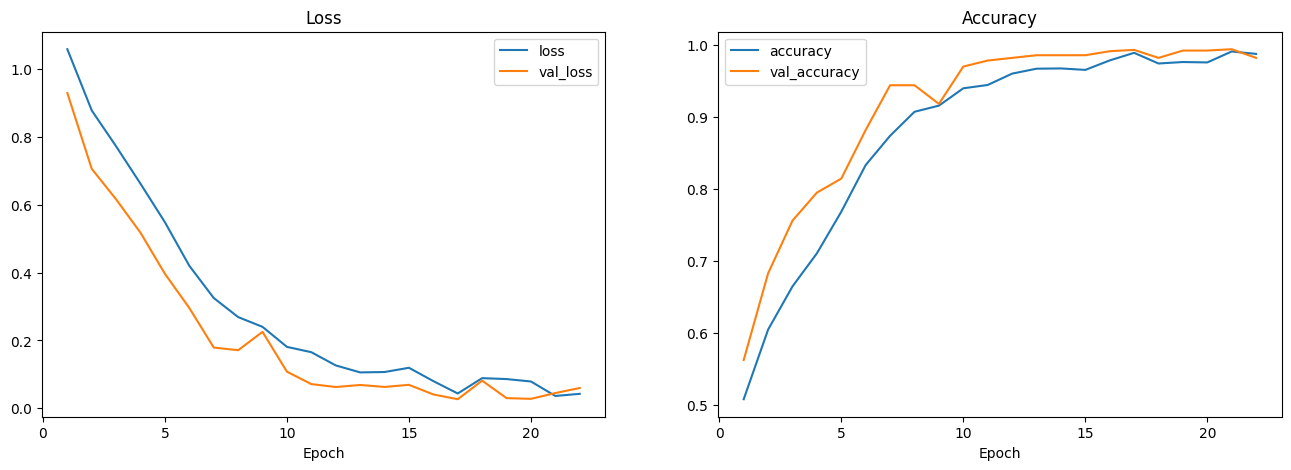

In [ ]:
epoch=22

fig, ax = plt.subplots(ncols=2,figsize=(16,5))
ax[0].plot(range(1,epoch+1),history_imp.history['loss'],label='loss')
ax[0].plot(range(1,epoch+1),history_imp.history['val_loss'],label='val_loss')
ax[0].set_title('Loss')
ax[0].legend()
ax[0].set_xlabel('Epoch')
#ax[0].set_ylim(0,0.01)

ax[1].plot(range(1,epoch+1),history_imp.history['accuracy'],label='accuracy')
ax[1].plot(range(1,epoch+1),history_imp.history['val_accuracy'],label='val_accuracy')
ax[1].set_title('Accuracy')
ax[1].legend()
ax[1].set_xlabel('Epoch')
#ax[1].set_ylim(0.5,1.5)

plt.show()

## Model Evaluation

## Model Saving

In [ ]:
with open('model sequential improve.pkl','wb') as file1:
    pickle.dump(model_imp,file1)

model.save('model sequential improve.h5')

INFO:tensorflow:Assets written to: ram://ba944b6d-ecf6-417d-b465-55e86ccac779/assets


INFO:tensorflow:Assets written to: ram://ba944b6d-ecf6-417d-b465-55e86ccac779/assets
